# Longest Collatz Sequence

The following iterative sequence is defined for the set $a$ of positive integers:

$${a_n} = \left\{ {\begin{array}{*{20}{c}}
  {\frac{n}{2}\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,n\bmod 2 = 0} \\ 
  {3n + 1\,\,\,\,\,\,n\bmod 2 = 1} 
\end{array}} \right.$$

Using the rule above and starting with 13, we generate the following sequence:

$$\left\{ {13,40,20,10,5,16,8,4,2,1} \right\}$$

## Question

Which starting number, under one million, produces the longest chain?

## Observations

Notice that given to collatz sequences $a_n$ and $a_m$, such that $n>m$:

$${a_m} \subset {a_n} \Leftrightarrow m \in {a_n}$$

Also:

$$O({a_n}) = O({a_n} \cap {a_m}) + O({a_m})$$

Thus, when finding the largest order Collatz sequence under $10^6$, the function can access a cache to find the order of previous subsets. This avoids redundancy inherit in a recursive lookup.

## Python

In [7]:
cacheOrders = {}

In [56]:
def getCollatzOrder(number, depth=0):
    if number in cacheOrders:
        return depth + cacheOrders[number]
    
    if number == 1:
        return depth
    elif number % 2 == 0:
        return getCollatzOrder(number/2, depth+1)
    else:
        return getCollatzOrder(3*number+1, depth+1)

In [57]:
maxOrder = 0
maxNum = 0
for i in range(1, 10**6):
    order = getCollatzOrder(i)
    cacheOrders[i] = order
    if maxOrder < order:
        maxOrder = order
        maxNum = i
print("The Collatz number is %s with a order of %s." %(maxNum, maxOrder))

The Collatz number is 837799 with a order of 524.


## Visualization

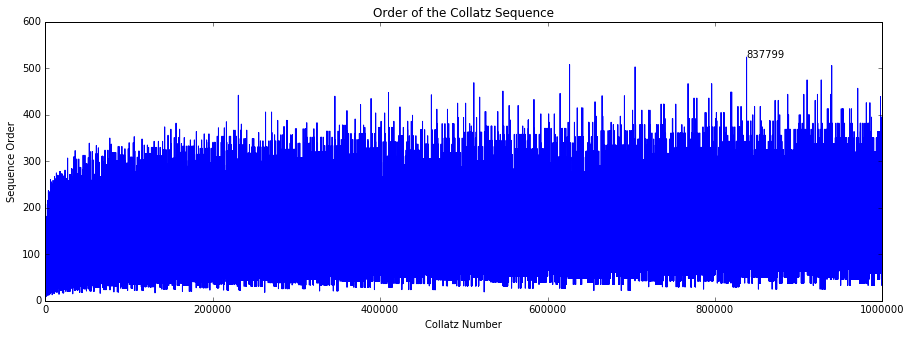

In [58]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

x = np.arange(1, 10**6,1)
y = np.array([cacheOrders[i] for i in range(1, 10**6)])

pl.figure(figsize=(15,5), dpi=600)
pl.plot(x,y)
pl.annotate('837799', xy=(837799 , 524), xytext=(837799, 524),
            
            )
pl.title("Order of the Collatz Sequence")
pl.xlabel("Collatz Number")
pl.ylabel("Sequence Order")
pl.show()

## Cache Optimization

In [64]:
def getCollatzOrderNoCache(number, depth=0):
    if number == 1:
        return depth
    elif number % 2 == 0:
        return getCollatzOrder(number/2, depth+1)
    else:
        return getCollatzOrder(3*number+1, depth+1)
    

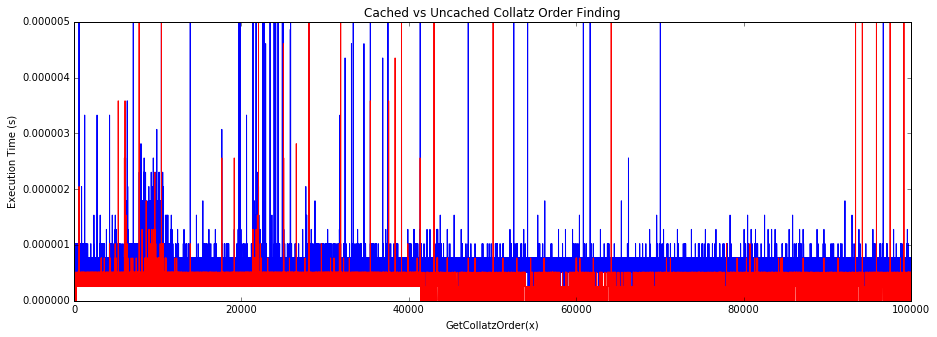

In [81]:
import time

timeCache = []
timeNoCache = []

for i in range(1, 10**5):
    start = time.clock()
    getCollatzOrderNoCache(i)
    end = time.clock()
    timeNoCache.append(end - start)
    start = time.clock()
    getCollatzOrder(i)
    end = time.clock()
    timeCache.append(end - start)
x = np.arange(1, 10**5, 1)

pl.figure(figsize=(15,5), dpi=600)
pl.plot(x, timeNoCache,'b',x,timeCache,'r')
pl.axis([0, 10**5, 0, 0.000005])
pl.title("Cached vs Uncached Collatz Order Finding")
pl.xlabel("GetCollatzOrder(x)")
pl.ylabel("Execution Time (s)")
pl.show()    

In [88]:
begin = time.clock()
for i in range(1, 10**6):
    getCollatzOrderNoCache(i)
end = time.clock()
time1 = end -begin
print("Found 1,000,000 collatz orders in %s seconds without a cache." % (time1))

begin = time.clock()
for i in range(1, 10**6):
    getCollatzOrder(i)
end = time.clock()
time2 = end - begin
print("Found 1,000,000 collatz orders in %s seconds with a cache." % (time2))

Found 1,000,000 collatz orders in 1.248263420443493 seconds without a cache.
Found 1,000,000 collatz orders in 0.1984736224740118 seconds with a cache.


In [97]:
print("Cached version is %s%% faster than uncached version" % (int((time1/time2)*100)))

Cached version is 628% faster than uncached version


## Complexity